In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here's why you might use Seaborn over matplotlib:

- **Simplified Syntax**: Less code for complex visualizations.
- **Built-in Themes**: Predefined styles for attractive plots.
- **Better Color Handling**: Advanced palette options and usage.
- Statistical Plotting**: Supports advanced plots like violin and box plots.
- Data Frames Support: Direct plotting from pandas data structures.
- Automatic Estimation: Built-in linear regression plotting.
- Faceting: Easy creation of multi-plot grids for data comparison.

### Install and import seaborn

In [2]:
import seaborn as sns

### Bar plots

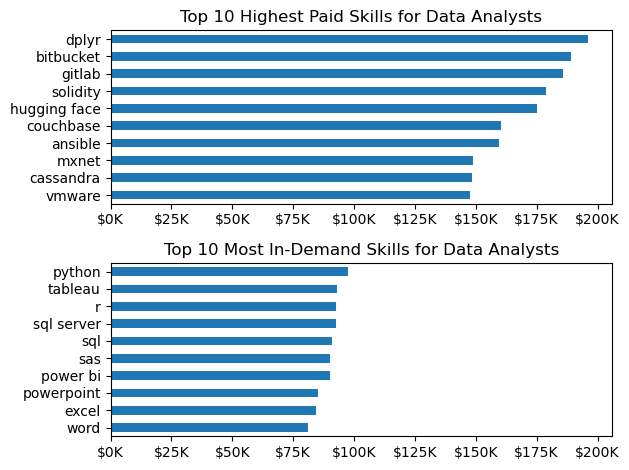

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_stats = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

top_median = df_DA_US_stats.sort_values('median',ascending=False).head(10)

top_demanded = df_DA_US_stats.sort_values('count',ascending=False).head(10).sort_values('median',ascending=False) # sorting the top10 demanded skill based on salary

######## Using Matplotlib #########
fig,ax = plt.subplots(2,1)

top_median[::-1].plot(kind='barh', y= 'median', ax= ax[0], legend= False)

top_demanded[::-1].plot(kind='barh', y= 'median', ax= ax[1], legend= False)


ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()

Using seaborn: we dont need to mention the barh, just plot the x (horizontal) and y (vertical)

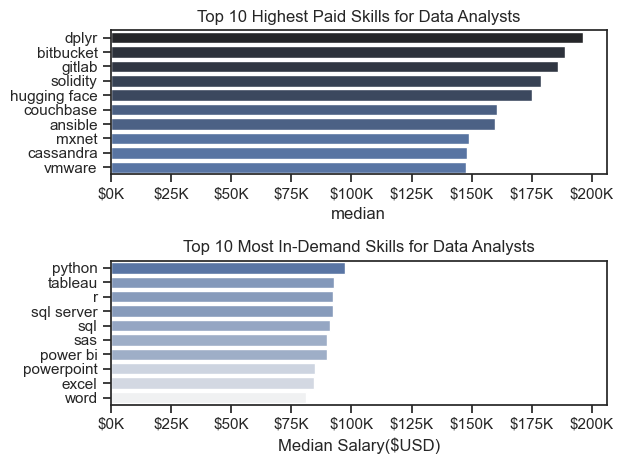

In [20]:

fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data= top_median, x='median', y=top_median.index, hue= 'median', ax=ax[0], palette= 'dark:b_r') # I can use the index name if I want in y= 
#top_median[::-1].plot(kind='barh', y= 'median', ax= ax[0], legend= False)

sns.barplot(data= top_demanded, x='median', y=top_demanded.index, hue= 'median', ax=ax[1], palette= 'light:b')
#top_demanded[::-1].plot(kind='barh', y= 'median', ax= ax[1], legend= False)


ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().set_visible(False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary($USD)')
ax[1].legend().set_visible(False)

fig.tight_layout()
plt.show()

### Histograms

Matplotlib or Pandas

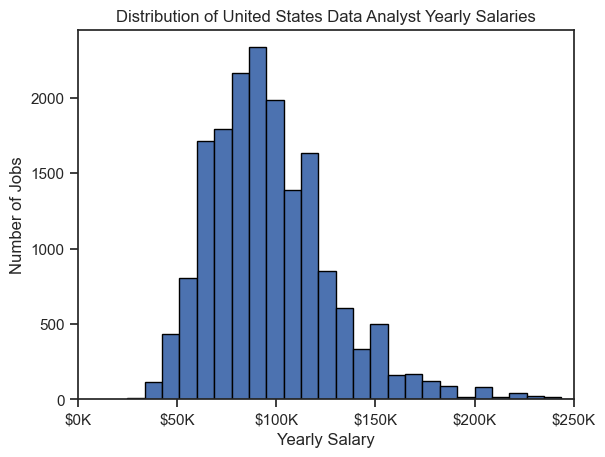

In [22]:
df_DA_US.salary_year_avg.plot(kind='hist',bins = 40 ,edgecolor= 'black') # bins are the number of bars in the hist
# Alternatively, with matplotlib
# plt.hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black')

plt.xlim(0,250000)

ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

Seaborn with KDE

Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

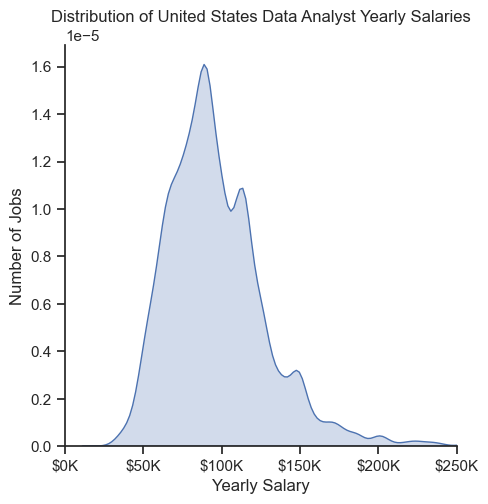

In [27]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill= True, common_norm=False)

plt.xlim(0,250000)

ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

### Box Plots

Matplotlib

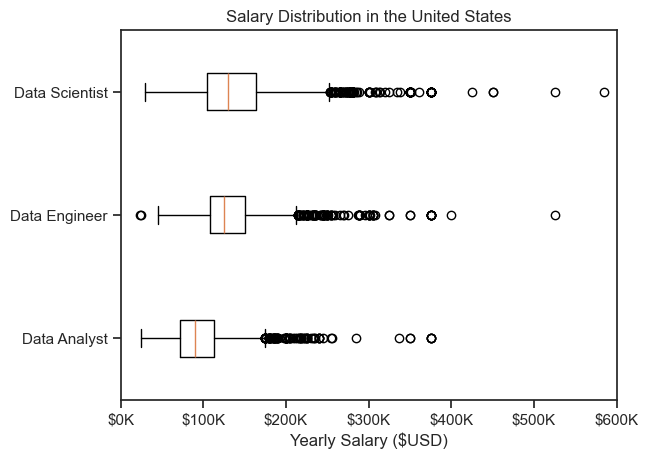

In [30]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, tick_labels= job_titles, vert= False) # for each job_title in job_titles there will be a tick label
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

Seaborn (much easier with it).

didn't need to create the job_list to use it with seaborn just specify the filtered columns unlike matplotlib.

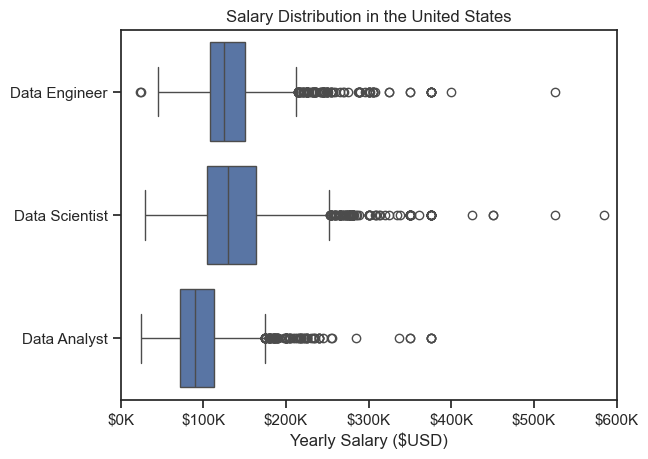

In [32]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])


sns.boxplot(df_US , x= 'salary_year_avg',y= 'job_title_short') 
# plt.boxplot(job_list, tick_labels= job_titles, vert= False) # for each job_title in job_titles there will be a tick label
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.ylabel('')
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()